In [1]:
import os
import pandas as pd
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

In [2]:
from dotenv import load_dotenv
load_dotenv()

True

In [3]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")


In [27]:
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [28]:
timeframe = "1D"

In [35]:
# Set start and end datetimes between now and 5 years ago.
start_date = pd.Timestamp("2018-05-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-07-25", tz="America/New_York").isoformat()

In [40]:
tickers = ["MARA","RIOT","AU","AEM"]

In [41]:
df_ticker = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df

In [42]:
df_ticker.dropna(inplace=True)

In [52]:
df_ticker

AEM                                    AU  \
                            open    high    low  close   volume   open   
time                                                                     
2018-05-01 00:00:00-04:00  41.90  42.220  41.04  42.21  1008891   8.99   
2018-05-02 00:00:00-04:00  42.40  42.800  41.86  41.97   892399   9.14   
2018-05-03 00:00:00-04:00  42.43  42.700  42.06  42.41   799660   9.27   
2018-05-04 00:00:00-04:00  42.13  42.790  42.13  42.64   559123   8.82   
2018-05-07 00:00:00-04:00  42.49  43.010  42.40  42.77   469028   8.83   
...                          ...     ...    ...    ...      ...    ...   
2021-07-19 00:00:00-04:00  60.50  61.550  60.04  60.75  1233291  19.30   
2021-07-20 00:00:00-04:00  61.12  62.149  60.43  60.95  1043061  19.68   
2021-07-21 00:00:00-04:00  60.57  61.420  60.12  61.18   673712  19.18   
2021-07-22 00:00:00-04:00  60.88  61.020  59.55  60.37   858522  19.54   
2021-07-23 00:00:00-04:00  60.09  60.360  59.36  59.95   847514  19.37   

                                                               MARA         \
                              high      low   close   volume   open   high   
time                                                                         
2018-05-01 00:00:00-04:00   9.0600   8.8899   9.020  1847647   1.69   1.71   
2018-05-02 00:00:00-04:00   9.3800   9.1000   9.160  4093153   1.64   1.68   
2018-05-03 00:00:00-04:00   9.2900   8.8800   8.900  5524215   1.56   1.77   
2018-05-04 00:00:00-04:00   8.9300   8.7400   8.885  3609019   1.80   1.80   
2018-05-07 00:00:00-04:00   8.8800   8.5000   8.565  3925005   1.58   1.64   
...                            ...      ...     ...      ...    ...    ...   
2021-07-19 00:00:00-04:00  19.6200  19.1400  19.390  2403054  22.09  23.26   
2021-07-20 00:00:00-04:00  20.0600  19.4400  19.590  2166892  21.92  22.90   
2021-07-21 00:00:00-04:00  19.6400  19.1700  19.550  1669455  24.13  25.70   
2021-07-22 00:00:00-04:00  19.5736  19.1700  19.330  1597963  25.45  25.64   
2021-07-23 00:00:00-04:00  19.4400  19.0300  19.220  2104119  25.05  25.35   

                                                        RIOT                  \
                               low    close    volume   open   high      low   
time                                                                           
2018-05-01 00:00:00-04:00   1.5600   1.6200   1703773   7.14   7.47   7.0200   
2018-05-02 00:00:00-04:00   1.5500   1.5650   1225389   7.37   7.37   7.1432   
2018-05-03 00:00:00-04:00   1.5600   1.7597   2650072   7.36   7.67   7.1100   
2018-05-04 00:00:00-04:00   1.6100   1.6500   1756510   7.90   8.15   7.4110   
2018-05-07 00:00:00-04:00   1.5600   1.5950    897813   7.31   7.80   7.3100   
...                            ...      ...       ...    ...    ...      ...   
2021-07-19 00:00:00-04:00  21.6700  22.3500   5495399  25.99  26.87  25.5700   
2021-07-20 00:00:00-04:00  20.6100  22.6700   5894828  25.35  26.32  23.9300   
2021-07-21 00:00:00-04:00  23.9604  25.0500  10135522  27.80  29.91  27.6100   
2021-07-22 00:00:00-04:00  24.0800  25.2600   6391426  29.25  29.44  27.7200   
2021-07-23 00:00:00-04:00  23.8000  24.6500   5045859  28.89  29.75  27.0500   

                                             
                            close    volume  
time                                         
2018-05-01 00:00:00-04:00   7.340    238979  
2018-05-02 00:00:00-04:00   7.210    173215  
2018-05-03 00:00:00-04:00   7.660    310503  
2018-05-04 00:00:00-04:00   7.530    584968  
2018-05-07 00:00:00-04:00   7.540    404138  
...                           ...       ...  
2021-07-19 00:00:00-04:00  25.930   5739228  
2021-07-20 00:00:00-04:00  25.850   6477411  
2021-07-21 00:00:00-04:00  29.150  11329112  
2021-07-22 00:00:00-04:00  28.864   6850411  
2021-07-23 00:00:00-04:00  28.090   7345094  

[814 rows x 20 columns]

In [53]:
MC_even_dist = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.25,.25,.25,.25],
    num_simulation = 1000,
    num_trading_days = 252*5
)

In [54]:
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.947175,0.983192,1.008689,0.962504,1.096362,0.993457,0.939916,1.034006,0.954892,1.015029,...,0.971799,1.024241,0.922901,0.980593,0.975695,1.016423,1.055449,1.054479,1.021935,1.003819
2,1.026908,0.937248,1.014220,0.955196,1.079198,0.972873,0.952340,1.069419,0.934428,0.980449,...,0.939657,1.061154,0.923691,1.029342,0.985287,1.034585,1.081518,1.087203,1.080576,1.027989
3,0.933886,0.964364,1.021213,1.014106,1.108878,0.987226,0.946731,1.068815,0.981908,0.920796,...,0.915604,1.124364,0.937344,1.006677,0.980903,1.024030,1.093164,1.122270,1.192117,1.017073
4,0.981604,1.062728,1.061273,0.981635,1.141760,1.006944,0.918759,1.084549,0.991239,0.946554,...,0.864826,1.194269,0.963777,1.032069,1.004346,0.971658,1.100445,1.096047,1.229571,1.045224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,84.097121,251.810329,125.115094,6.904010,14.030033,48.143359,32.856094,333.200100,60.666937,113.159415,...,231.306473,22.852885,139.823754,117.575701,20.591383,5.847415,230.390381,27.667546,62.755619,19.323749
1257,88.257638,248.002303,122.333802,6.975874,14.025443,44.407268,33.733097,363.552764,59.486210,107.740144,...,230.279808,24.442606,147.932376,120.074733,21.705492,6.083661,244.352016,26.666647,62.938174,19.783085
1258,84.483018,254.889603,121.428534,6.865758,14.019244,42.557942,32.799163,362.471630,61.165360,104.892369,...,225.463746,25.561923,131.789493,115.264879,21.358982,5.851489,244.916396,26.013861,57.752338,21.938501
1259,91.806111,259.312059,131.068388,6.974844,12.996336,41.832024,32.072404,386.031252,64.590388,98.660290,...,222.125393,27.651874,123.147305,116.071313,22.171895,6.200014,267.238450,26.389184,61.090994,22.756603


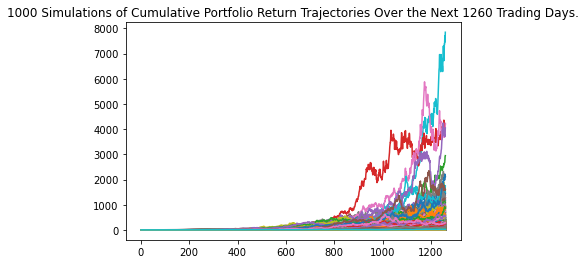

In [47]:
line_plot = MC_even_dist.plot_simulation()

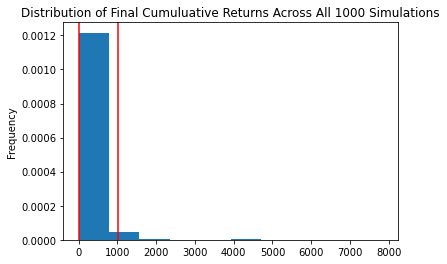

In [48]:
att_dist_plot = MC_even_dist.plot_distribution()